01/31/2021

Unsupervised Analysis Project

Team 5: 
- Alban de Raemy
- Aminder Kaur
- Giulio Marchesi
- Sophie Bianchi 
- YongLe Li 

<h1> Introduction <h/1>

Apple, to better understand what push its target customers to buy its products rather than Windows,  has decided to analyze its audience from the perspective of the Big Five personality traits and the Hult DNA. For this purpose, the company has commissioned a survey with many behavioral questions, as well as demographics and habits.
In this analysis, we're taking into account the replies of the 137 Hult students from different programs that answered 77 questions.

We will use unsupervised machine learning algorithms (PCA and Clustering) to better understand what drives the purchase of one one brand of computer over another one and to help predict the purchasing behavior of the students based on demographics and psychographics.

[Source1](https://www.hult.edu/blog/culture-that-drives-performance-dna/) [Source2](https://www.hult.edu/blog/why-every-leader-needs-growth-mindset/)

<h2> Understanding the data<h/2>

<h3> Customer Psychology <h/3>

Customer psychology is extremely complex. In order to better understand types of customers, psychologist have developed the OCEAN model also known as big five personality traits. 

<h3>Behaviour<h/3>

Certain behaviors lead customers to different outcomes in their lifes. Hult has created their Hult DNA for behaviors that drive performance. It is developed in every student during their Hult journey.

<h3>5 Personality Test<h/>

More in detail, the Big 5 Personality are:

 1) Openness
 
 2) Consciousness
 
 3) Extraversion
 
 4) Agreeableness
  
 5) Neuroticism

<h3>Hult DNA<h/3>

The Hult DNA consists of 3 categories and 3 subcategories: 
Thinking
 - Shows self-awareness
 - Embraces change
 - Demonstrates dynamic thinking

Communicating
 - Speaks and listens skillfully
 - Influences confidently
 - Presents ideas effectively

Team Building
 - Fosters collaborative relationships
 - Influences productivity
 - Resolves conflict constructively

Combining all these psychographic aspects with demographics, we'll define Apple's target customers' behaviors and preferences.

# Data Analysis

In [73]:
########################################
# importing packages
########################################
import pandas            as pd  # data science essentials
import matplotlib.pyplot as plt # fundamental data visualization
import seaborn           as sns # enhanced visualization
import sys                      # system-specific parameters and functions


# new libraries
from sklearn.decomposition import PCA            # pca
from sklearn.datasets      import load_digits    # digits dataset
from sklearn.manifold      import TSNE           # t-SNE
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA                   # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster  import  KMeans  


########################################
# loading data and setting display options
########################################
# loading data

#file name
file = './survey_data.xlsx'
survey = pd.read_excel(io=file)


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
pd.np.set_printoptions(threshold=sys.maxsize)


<ipython-input-73-8c59c57c48f3>:35: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.set_printoptions(threshold=sys.maxsize)


<h2>Dataset Characteristics<h/2>

**Responses**

There are 137 people who have taken the survey.

**Variables**

They have answered 78 questions (79 -1 surveyID).

**Interval Variables**

There are 71 numerical variables that are a mix of the Big Five personality traits and the Hult DNA characteristics. The respondents rated the Big 5 personality traits and the Hult DNA characteristics from 1 to 5 in ascending order of preference. 

**Categorical Variables**

There are 7 categorical variables which include 2 variables that define what laptop does the respondent have and what laptop they would like in the future. Then there are 5 variables that describe the demographics such as Gender, Age (numeric but will be transformed), Nationality, Hult Program and Ethinicity.

**Missing Values**

There are 0 missing values in the dataset.

**Data Source**

The data is from a survey taken by 137 Hult Students.

<h2> Data Cleaning <h/2>

<h3>Duplicate Questions<h/3>

While checking the features we noticed that some of the questions were repeated:
- Respond effectively to multiple priorities,
- Take initiative even when circumstances, objectives, or rules aren't clear
- Encourage direct and open discussions

Before removing them, we decided to test if the student responded in the same manner in the repeated question to see if we can trust their response.

If the difference between two answers was more than 2, we dropped these answers.

In [74]:
#Find the Index of the dupllicated columns

#print(survey.columns.get_loc("Respond effectively to multiple priorities"))
#print(survey.columns.get_loc("Respond effectively to multiple priorities.1"))
#print(survey.columns.get_loc("Take initiative even when circumstances, objectives, or rules aren't clear"))
#print(survey.columns.get_loc("Take initiative even when circumstances, objectives, or rules aren't clear.1"))
#print(survey.columns.get_loc("Encourage direct and open discussions"))
#print(survey.columns.get_loc("Encourage direct and open discussions.1"))

In [75]:
# find answer discrepancies between duplicated questions
question_1  = []
question_2  = []
question_3  = []

for index in survey.iterrows():
    question_1 = abs(survey.iloc[:,55] - survey.iloc[:,58])
    survey['question_1'] = question_1
    question_2 = abs(survey.iloc[:,56] - survey.iloc[:,59])
    survey['question_2'] = question_2
    question_3 = abs(survey.iloc[:,57] - survey.iloc[:,60])
    survey['question_3'] = question_3
                                                                                              
survey_result1 =survey[survey['question_1']>2]  
survey_result2 =survey[survey['question_2']>2] 
survey_result3 =survey[survey['question_3']>2] 

In [76]:
# Checking which customer had discrepancies
survey_result1.head (n=5) 
survey_result2.head (n=5)
survey_result3.head (n=5)

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?,question_1,question_2,question_3
93,10093,1,2,3,1,3,5,4,5,5,1,3,3,3,4,4,5,5,2,5,1,3,5,2,5,5,5,4,1,2,5,1,2,3,4,5,5,3,3,2,1,1,5,3,1,5,5,4,5,1,5,5,5,5,1,3,5,1,5,5,5,5,5,5,5,5,5,5,5,5,2,5,Windows laptop,Macbook,DD (MIB & Business Analytics),24,Male,Indonesian,Far east Asian,2,0,4


In [77]:
# dropping the respondent that had discrepancies
survey = survey.drop(index=[93])

We found that only one respondent had discrepancies in their answers. We remove their response.

<h3> Outlier Strategy <h/3>

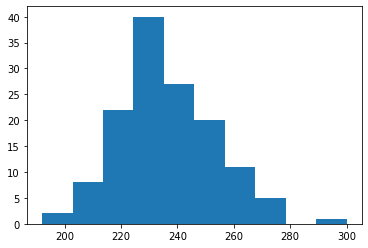

In [78]:
# Reviewing personality respond questions: 
survey_df_noage = survey.drop(columns=['What is your age?', 'surveyID'], axis = 1)
#removing the age so it wont be added to the total column 
survey.loc[:,'Total'] = survey_df_noage.sum(numeric_only=True, axis=1)
plt.hist(survey['Total'])
plt.show()

In [79]:
## Outliers: 
responses_hi = 280
survey['out_responses'] = 0


# looping over one column  to change another 
for index, resp in survey.loc[ : , : ].iterrows():

    # setting conditional 
    if survey.loc[ index , 'Total'] > responses_hi: 
        # changing outlier flag
        survey.loc[ index , 'out_responses'] = 1

In [80]:
survey.loc[:,:][survey.loc[:,'out_responses'] ==1]


,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?,question_1,question_2,question_3,Total,out_responses
91,10091,5,5,2,5,2,5,5,5,5,4,4,4,4,4,4,4,5,4,4,4,4,4,4,4,4,4,4,4,5,3,4,1,4,4,4,5,4,4,4,4,4,5,4,5,5,4,5,5,5,4,5,5,5,4,5,4,5,4,4,5,4,4,5,5,4,4,3,4,4,4,4,Macbook,Windows laptop,One year Business Analytics,24,Male,China,Far east Asian,1,0,0,300,1


We have identified the outlier and we assuming this person not to be very cooperative and that he/she might have rated all the responses the same numbers or almost the same due to laziness or other reasons. 

However, after analyzing his responses and looking at both his categorical and interval variables we have concluded that the answers can be considered valid and reliable as the categorical variables appear to be truthful as they are filled out correctly, and the interval variables have mixed numbers, even though the majority of the responses are 4s and 5s. Therefore, we have decided not to drop this outlier as it constitutes valuable data for the analysis.

<h3>Age<h/3>

/Users/aminderpalkaur/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


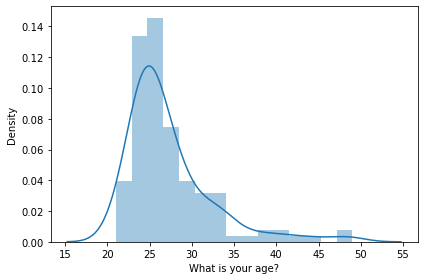

In [81]:
# to have a better understanding of the demographic data, we decided to devide
# the age variable into 4 groups.

# STEP 1: Creating an histogram to see the age distribution. 
sns.distplot(a = survey['What is your age?'],
                 hist = True,
                 kde = True)
    
plt.tight_layout()
plt.show()

As we can see the age of our respondents is distributed from 21 to 49 years old. The majority is from 23-27 which is usually the age of graduate students. We separated the respondent in 4 age groups.

In [82]:
# STEP 2: # Dividing age into the categories
age_lst = []

for row,col in survey.iterrows():
    if survey.loc[row,'What is your age?'] < 25:
        age_lst.append('< 25')
    elif survey.loc[row,'What is your age?'] >=25 and survey.loc[row,'What is your age?'] < 30:   
        age_lst.append('25 - 30')
    elif survey.loc[row,'What is your age?'] >=30 and survey.loc[row,'What is your age?'] < 35: 
        age_lst.append('30 - 35')
    else:
        age_lst.append('>=35')

# Adding new variable to dataset
survey['age_group'] = pd.Series(age_lst)

# STEP 3: Checking the dataset with the new categorical variables 
survey.head(n=5)

print(f"""
Age Group
------
{survey['age_group'].value_counts().sort_index()}

""")


Age Group
------
25 - 30    65
30 - 35    17
< 25       43
>=35       10
Name: age_group, dtype: int64




<h3>Master Program<h/3>

<AxesSubplot:xlabel='count', ylabel='What program are you in?'>

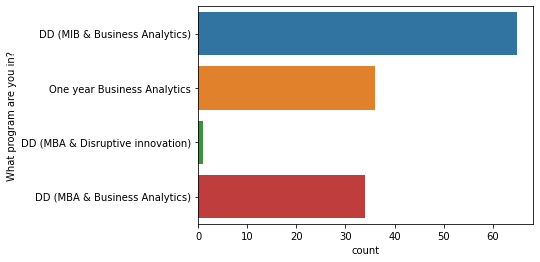

In [83]:
# To have a better understanding of the demographic data, we decided to group 
# the responders into the master they're attenting. 

# STEP 1: Creating an histogram to see the master distribution. 
sns.countplot(y='What program are you in?',data=survey)

As we can see on the graph the majority of the students are from Dual Degree programs (MIB + MSBA) and (MBA + MSBA). The program with the fewer repsondent is the dual degree in MBA and MDI

In [84]:
# STEP 2: # Dividing master into the categories
master_lst = []

for row,col in survey.iterrows():
    if survey.loc[row,'What program are you in?'] == 'DD (MIB & Business Analytics)':
        master_lst.append('DD: MIB + MSBA')
    elif survey.loc[row, 'What program are you in?'] == 'One year Business Analytics':   
        master_lst.append('MSBA')
    elif survey.loc[row,'What program are you in?'] =='DD (MBA & Disruptive innovation)': 
        master_lst.append('DD: MBA + MDI')
    else:
        master_lst.append('DD: MBA + MSBA')

# Adding new variable to dataset
survey['master_group'] = pd.Series(master_lst)

# STEP 3: Checking the dataset with the new categorical variables 
survey.head(n=5)

print(f"""
Master Group
------
{survey['master_group'].value_counts().sort_index()}

""")


Master Group
------
DD: MBA + MDI      1
DD: MBA + MSBA    34
DD: MIB + MSBA    64
MSBA              36
Name: master_group, dtype: int64




<h3>Nationality Variable<h/3>

In [85]:
survey['What is your nationality? '] = survey['What is your nationality? '].str.lower()

In [86]:
#survey['What is your nationality? '].value_counts()

We decided to divide the nationalities based on the data published in 2017 by the United Nations International Telecommunication Union, the countries have been divided into different levels - below 2, 2 - 4 , 4-6,6-8 and above 8.
Where the countries that have below 2 are the worst and above 8 are the best. 
In the data some countries data have not been provided so its labeled as no_value or if the person didnt fill their country it is also no_value.

This metric tracks the each country's technological/ telecommunication advancement. It's used bu governement and researcher to compare countries based on ICT development index.
link to site :https://www.mapsofworld.com/answers/world/nations-rank-high-terms-information-communication-technology/#

In [87]:
#creating a duplicate column 
survey.loc[:, 'ict '] = survey.loc[:, 'What is your nationality? ']

In [88]:
# Assigning  ICT scores for each country
survey['ict '] = survey['ict '].replace(['indian'],'2_4')
survey['ict '] = survey['ict '].replace(['china'],'4_6')
survey['ict '] = survey['ict '].replace(['german'],'above_8')
survey['ict '] = survey['ict '].replace(['mexican'],'4_6')
survey['ict '] = survey['ict '].replace(['peruvian'],'4_6')
survey['ict '] = survey['ict '].replace(['colombian'],'4_6')
survey['ict '] = survey['ict '].replace(['chinese'],'4_6')
survey['ict '] = survey['ict '].replace(['italian'],'4_6')
survey['ict '] = survey['ict '].replace(['usa'],'above_8')
survey['ict '] = survey['ict '].replace(['american'],'above_8')
survey['ict '] = survey['ict '].replace(['taiwan'],'no_value')
survey['ict '] = survey['ict '].replace(['norwegian'],'above_8')
survey['ict '] = survey['ict '].replace(['russian'],'6_8')
survey['ict '] = survey['ict '].replace(['brazilian'],'6_8')
survey['ict '] = survey['ict '].replace(['nigerian'],'2_4')
survey['ict '] = survey['ict '].replace(['thai'],'4_6')
survey['ict '] = survey['ict '].replace(['ecuador'],'no_value')
survey['ict '] = survey['ict '].replace(['turkish'],'6_8')
survey['ict '] = survey['ict '].replace(['vietnamese'],'4_6')
survey['ict '] = survey['ict '].replace(['russia'],'6_8')
survey['ict '] = survey['ict '].replace(['brazil'],'6_8')
survey['ict '] = survey['ict '].replace(['republic of korea'],'above_8')
survey['ict '] = survey['ict '].replace(['indonesian'],'4_6')
survey['ict '] = survey['ict '].replace(['peru'],'4_6')
survey['ict '] = survey['ict '].replace(['south korea'],'above_8')
survey['ict '] = survey['ict '].replace(['ecuadorian'],'no_value')
survey['ict '] = survey['ict '].replace(['indian.'],'2_4')
survey['ict '] = survey['ict '].replace(['ukrainian'],'4_6')
survey['ict '] = survey['ict '].replace(['belarus'],'6_8')
survey['ict '] = survey['ict '].replace(['colombia'],'4_6')
survey['ict '] = survey['ict '].replace(['kyrgyz'],'4_6')
survey['ict '] = survey['ict '].replace(['korea'],'above_8')
survey['ict '] = survey['ict '].replace(['belgian'],'no_value')
survey['ict '] = survey['ict '].replace(['czech republic'],'6_8')
survey['ict '] = survey['ict '].replace(['ugandan'],'2_4')
survey['ict '] = survey['ict '].replace(['czech'],'6_8')
survey['ict '] = survey['ict '].replace(['pakistani'],'2_4')
survey['ict '] = survey['ict '].replace(['italian and spanish'],'no_value')
survey['ict '] = survey['ict '].replace(['nigeria'],'2_4')
survey['ict '] = survey['ict '].replace(['congolese (dr congo)'],'below_2')
survey['ict '] = survey['ict '].replace(['filipino'],'4_6')
survey['ict '] = survey['ict '].replace(['canadian'],'6_8')
survey['ict '] = survey['ict '].replace(['panama'],'4_6')
survey['ict '] = survey['ict '].replace(['dominican '],'4_6')
survey['ict '] = survey['ict '].replace(['philippines'],'4_6')
survey['ict '] = survey['ict '].replace(['mauritius'],'4_6')
survey['ict '] = survey['ict '].replace(['japan'],'above_8')
survey['ict '] = survey['ict '].replace(['costarrican'],'6_8')
survey['ict '] = survey['ict '].replace(['portuguese'],'6_8')
survey['ict '] = survey['ict '].replace(['british'],'above_8')
survey['ict '] = survey['ict '].replace(['canada'],'6_8')
survey['ict '] = survey['ict '].replace(['spain'],'6_8')
survey['ict '] = survey['ict '].replace(['indonesia'],'4_6')
survey['ict '] = survey['ict '].replace(['swiss'],'above_8')
survey['ict '] = survey['ict '].replace(['congolese'],'below_2')
survey['ict '] = survey['ict '].replace(['dominican'],'4_6')
survey['ict '] = survey['ict '].replace(['spanish'],'6_8')
survey['ict '] = survey['ict '].replace(['venezuelan'],'no_value')
survey['ict '] = survey['ict '].replace(['germany'],'above_8')
survey['ict '] = survey['ict '].replace(['british, indian'],'no_value')
survey['ict '] = survey['ict '].replace(['kenyan'],'2_4')
survey['ict '] = survey['ict '].replace(['german/american'],'no_value')
survey['ict '] = survey['ict '].replace(['prefer not to answer'],'no_value')
survey['ict '] = survey['ict '].replace(['ghanaian'],'no_value')

### Nationality Part II


Instead of looking at each respondent's nationality we separated them based on which continents they are from. Based on this list https://simple.wikipedia.org/wiki/List_of_countries_by_continents.
We created a new column called continents to better represnet where each respondent is from.

In [89]:
#creating a duplicate column 
survey.loc[:, 'continents '] = survey.loc[:, 'What is your nationality? ']

In [90]:
# Assigning  continents for each Nationality
survey['continents '] = survey['continents '].replace(['Asian'],'indian')
survey['continents '] = survey['continents '].replace(['china'],'Asian')
survey['continents '] = survey['continents '].replace(['german'],'European')
survey['continents '] = survey['continents '].replace(['mexican'],'N_American')
survey['continents '] = survey['continents '].replace(['peruvian'],'S_American')
survey['continents '] = survey['continents '].replace(['colombian'],'S_American')
survey['continents '] = survey['continents '].replace(['chinese'],'Asian')
survey['continents '] = survey['continents '].replace(['italian'],'European')
survey['continents '] = survey['continents '].replace(['usa'],'N_American')
survey['continents '] = survey['continents '].replace(['american'],'N_American')
survey['continents '] = survey['continents '].replace(['taiwan'],'Asian')
survey['continents '] = survey['continents '].replace(['norwegian'],'European')
survey['continents '] = survey['continents '].replace(['russian'],'European')
survey['continents '] = survey['continents '].replace(['brazilian'],'S_American')
survey['continents '] = survey['continents '].replace(['nigerian'],'African')
survey['continents '] = survey['continents '].replace(['thai'],'Asian')
survey['continents '] = survey['continents '].replace(['ecuador'],'S_American')
survey['continents '] = survey['continents '].replace(['turkish'],'European')
survey['continents '] = survey['continents '].replace(['vietnamese'],'Asian')
survey['continents '] = survey['continents '].replace(['russia'],'European')
survey['continents '] = survey['continents '].replace(['brazil'],'S_American')
survey['continents '] = survey['continents '].replace(['republic of korea'],'Asian')
survey['continents '] = survey['continents '].replace(['indonesian'],'Asian')
survey['continents '] = survey['continents '].replace(['peru'],'S_American')
survey['continents '] = survey['continents '].replace(['south korea'],'Asian')
survey['continents '] = survey['continents '].replace(['ecuadorian'],'S_American')
survey['continents '] = survey['continents '].replace(['indian.'],'Asian')
survey['continents '] = survey['continents '].replace(['ukrainian'],'European')
survey['continents '] = survey['continents '].replace(['belarus'],'European')
survey['continents '] = survey['continents '].replace(['colombia'],'S_American')
survey['continents '] = survey['continents '].replace(['kyrgyz'],'Asian')
survey['continents '] = survey['continents '].replace(['korea'],'Asian')
survey['continents '] = survey['continents '].replace(['belgian'],'European')
survey['continents '] = survey['continents '].replace(['czech republic'],'European')
survey['continents '] = survey['continents '].replace(['ugandan'],'African')
survey['continents '] = survey['continents '].replace(['czech'],'European')
survey['continents '] = survey['continents '].replace(['pakistani'],'Asian')
survey['continents '] = survey['continents '].replace(['italian and spanish'],'dual')
survey['continents '] = survey['continents '].replace(['nigeria'],'African')
survey['continents '] = survey['continents '].replace(['congolese (dr congo)'],'African')
survey['continents '] = survey['continents '].replace(['filipino'],'Asian')
survey['continents '] = survey['continents '].replace(['canadian'],'N_American')
survey['continents '] = survey['continents '].replace(['panama'],'N_American')
survey['continents '] = survey['continents '].replace(['dominican'],'N_American')
survey['continents '] = survey['continents '].replace(['philippines'],'Asian')
survey['continents '] = survey['continents '].replace(['mauritius'],'African')
survey['continents '] = survey['continents '].replace(['japan'],'Asian')
survey['continents '] = survey['continents '].replace(['costarrican'],'N_American')
survey['continents '] = survey['continents '].replace(['portuguese'],'European')
survey['continents '] = survey['continents '].replace(['british'],'European')
survey['continents '] = survey['continents '].replace(['canada'],'N_American')
survey['continents '] = survey['continents '].replace(['spain'],'European')
survey['continents '] = survey['continents '].replace(['indonesia'],'Asian')
survey['continents '] = survey['continents '].replace(['swiss'],'European')
survey['continents '] = survey['continents '].replace(['congolese'],'African')
survey['continents '] = survey['continents '].replace(['dominican'],'N_American')
survey['continents '] = survey['continents '].replace(['spanish'],'European')
survey['continents '] = survey['continents '].replace(['venezuelan'],'S_American')
survey['continents '] = survey['continents '].replace(['germany'],'European')
survey['continents '] = survey['continents '].replace(['british, indian'],'dual')
survey['continents '] = survey['continents '].replace(['kenyan'],'African')
survey['continents '] = survey['continents '].replace(['german/american'],'dual')
survey['continents '] = survey['continents '].replace(['prefer not to answer'],'no_value')
survey['continents '] = survey['continents '].replace(['ghanaian'],'African')

### Combining Mac and Macbook


In [91]:
# Combining 'Mac' and 'Macbook': 
def change_mac (column):
    survey[column]=survey[column].replace(to_replace="Mac",value="Macbook")

change_mac (["What laptop do you currently have?",
             "What laptop would you buy in next assuming if all laptops cost the same?"])

## Calculating Big 5 and Hult DNA scores

In [92]:
# Calculating the Big 5 personality and Hult DNA scores

# Empty List for big 5 personalities
survey['agreeableness'] = 0
survey['extroversion'] = 0
survey['conscientiousness'] = 0
survey['neuroticism'] = 0
survey['openness to experience'] = 0

#Hult DNA
survey['thinking'] = 0
survey['communicating'] = 0
survey['team building'] = 0

# for loop to calculate big 5 and hutl dna
for index, column in survey.loc[ : , : ].iterrows():
    
    survey.loc[index, 'agreeableness'] = [14 - survey.loc[index, 'Feel little concern for others']
            -survey.loc[index, 'Insult people']
            -survey.loc[index, """Am not interested in other people's problems"""]
            -survey.loc[index, 'Am not really interested in others']                              
            +survey.loc[index, 'Am interested in people']
            +survey.loc[index, """Sympathize with others' feelings"""]                           
            +survey.loc[index, 'Have a soft heart']
            +survey.loc[index, 'Take time out for others']
            +survey.loc[index, """Feel others' emotions"""]                
            +survey.loc[index, 'Make people feel at ease']]

    survey.loc[index, 'extroversion'] = [20 + survey.loc[index, 'Am the life of the party']
            -survey.loc[index, """Don't talk a lot"""]
            +survey.loc[index, """Feel comfortable around people"""]
            -survey.loc[index, """Keep in the background"""]
            +survey.loc[index, """Start conversations"""]
            -survey.loc[index, """Have little to say"""]
            +survey.loc[index, """Talk to a lot of different people at parties"""]
            -survey.loc[index, """Don't like to draw attention to myself"""]
            +survey.loc[index, """Don't mind being the center of attention"""]
            -survey.loc[index, """Am quiet around strangers"""]]

    survey.loc[index, 'conscientiousness'] = [14 + survey.loc[index, 'Am always prepared']
            -survey.loc[index, 'Leave my belongings around']
            +survey.loc[index, 'Pay attention to details']
            -survey.loc[index, 'Make a mess of things']
            +survey.loc[index, 'Get chores done right away']
            -survey.loc[index, 'Often forget to put things back in their proper place']
            +survey.loc[index, 'Like order']
            -survey.loc[index, 'Shirk my duties']
            +survey.loc[index, 'Follow a schedule']
            +survey.loc[index, 'Am exacting in my work']]
    
    survey.loc[index, 'neuroticism'] = [38 - survey.loc[index, 'Get stressed out easily']
            +survey.loc[index,'Am relaxed most of the time']
            +survey.loc[index,'Seldom feel blue']
            -survey.loc[index,'Worry about things']                            
            -survey.loc[index,'Am easily disturbed']
            -survey.loc[index,'Get upset easily']
            -survey.loc[index,'Change my mood a lot']
            -survey.loc[index,'Have frequent mood swings']
            -survey.loc[index,'Get irritated easily']
            -survey.loc[index,'Often feel blue']]

    
    survey.loc[index, 'openness to experience'] = [8 + survey.loc[index, 'Have a rich vocabulary']
            -survey.loc[index, 'Have difficulty understanding abstract ideas']
            -survey.loc[index, 'Am not interested in abstract ideas']
            -survey.loc[index, 'Do not have a good imagination']
            +survey.loc[index, 'Have excellent ideas']                                       
            +survey.loc[index, 'Have a vivid imagination']                                     
            +survey.loc[index, 'Use difficult words']
            +survey.loc[index, 'Am quick to understand things']                                      
            +survey.loc[index, 'Spend time reflecting on things']
            +survey.loc[index, 'Am full of ideas']]

    
    
####################    
#### Hult DNA ########    
######################    
    
    
    
    survey.loc[index, 'thinking'] = [survey.loc[index, 'See underlying patterns in complex situations']
            -survey.loc[index, """Don't  generate ideas that are new and different"""]
            +survey.loc[index, 'Demonstrate an awareness of personal strengths and limitations']
            +survey.loc[index, 'Display a growth mindset']]                    
    
    survey.loc[index, 'communicating'] = [survey.loc[index, 'Respond effectively to multiple priorities']
            +survey.loc[index, 'Encourage direct and open discussions']
            +survey.loc[index, """Take initiative even when circumstances, objectives, or rules aren't clear"""]
            +survey.loc[index, 'Listen carefully to others']
            -survey.loc[index, """Don't persuasively sell a vision or idea"""]]
                                                                                                             
    survey.loc[index, 'team building'] = [survey.loc[index, 'Build cooperative relationships']
            +survey.loc[index, 'Work well with people from diverse cultural backgrounds']
            +survey.loc[index, 'Effectively negotiate interests, resources, and roles']
            -survey.loc[index, """Can't rally people on the team around a common goal"""]
            +survey.loc[index, 'Seek and use feedback from teammates']
            +survey.loc[index, 'Translate ideas into plans that are organized and realistic']
            +survey.loc[index, 'Resolve conflicts constructively']
            +survey.loc[index, 'Coach teammates for performance and growth']
            +survey.loc[index, 'Drive for results']]
                                              


                                                     
                         
                           
                             
                    
                                                
                                       


# Modeling

## PCA Model

"Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation which converts a set of correlated variables to a set of uncorrelated variables."

### Scaling Data

Scaling our data is important to get better results with our models because they work based on the assumption of a normal distribution and on scaled variables.

In [93]:
# Copying the survey dataframe
survey_df = survey.copy()

In [94]:
# Dropping original variables: 
survey_df_new = survey.iloc[: , 88:93]

In [95]:
# Scaling dataset: 

# Instantiating:
scaler = StandardScaler()

# Fitting:
scaler.fit(survey_df_new)

# Transforming:
X_scaled = scaler.transform(survey_df_new)

# Converting into a DataFrame:
survey_scaled = pd.DataFrame(X_scaled)

# reattaching column names
survey_scaled.columns = survey_df_new.columns


# checking pre- and post-scaling variance
print(pd.np.var(survey_df_new), '\n\n')
print(pd.np.var(survey_scaled))

agreeableness             31.669064
extroversion              41.271140
conscientiousness         30.368512
neuroticism               47.029196
openness to experience    27.543253
dtype: float64 


agreeableness             1.0
extroversion              1.0
conscientiousness         1.0
neuroticism               1.0
openness to experience    1.0
dtype: float64


<ipython-input-95-eae75c314c1f>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(survey_df_new), '\n\n')
<ipython-input-95-eae75c314c1f>:21: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(survey_scaled))


### PCA

In [96]:
# User defined for PCA

def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        
        
    # displaying the plot
     plt.show()

### Developing a PCA object with no limit to principal components and analyzing its scree plot.

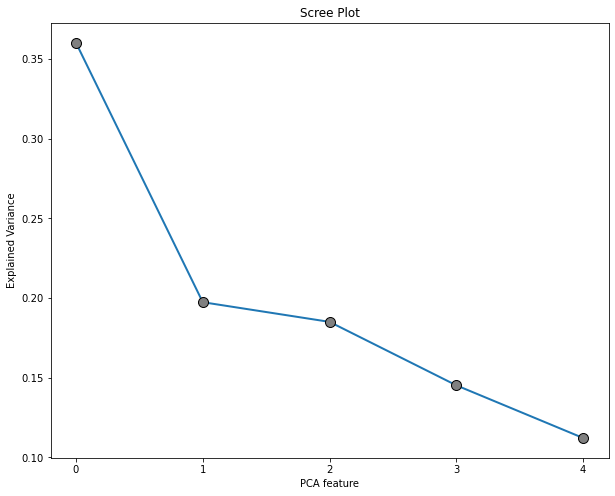

In [97]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components=None,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
survey_pca = pca.fit_transform(survey_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

### Reducing the number of principal components to a reasonable number based on the scree plot above

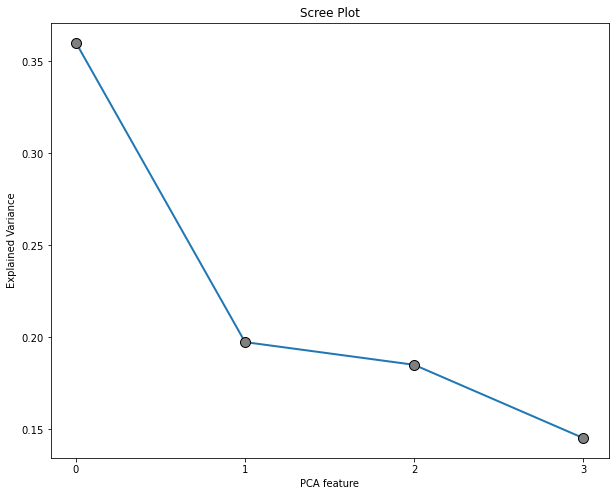

In [98]:
# INSTANTIATING a new model using the first four principal components
pca_1 = PCA(n_components = 4,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
survey_pca_1 = pca_1.fit_transform(survey_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca_1)

In [99]:
### ### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(survey_scaled.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_1.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(survey_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


4 Components Factor Loadings
------------------------------
{factor_loadings_3.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                           0     1     2     3     4
agreeableness          -0.51  0.17  0.29 -0.67  0.42
extroversion           -0.36  0.55 -0.63 -0.10 -0.39
conscientiousness      -0.51 -0.40  0.35  0.01 -0.67
neuroticism            -0.31 -0.67 -0.60  0.01  0.32
openness to experience -0.50  0.25  0.17  0.73  0.34


4 Components Factor Loadings
------------------------------
                           0     1     2     3
agreeableness          -0.51  0.17  0.29 -0.67
extroversion           -0.36  0.55 -0.63 -0.10
conscientiousness      -0.51 -0.40  0.35  0.01
neuroticism            -0.31 -0.67 -0.60  0.01
openness to experience -0.50  0.25  0.17  0.73



<ipython-input-99-6288cea64c9d>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))
<ipython-input-99-6288cea64c9d>:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_1.components_))


Here we decided to rename each component factor based on the children book series Mr and Mrs. Based on the psychological aspects we were able to match characters from the book series with these components. 
We selected:
- Mr Perfect for someone with high thinking, openness, and conscientiousness 
- Mr Party for someone with low neuroticism, high extroversion and openness
- Mr Chill based on very low extroversion and neuroticism, but high conscientiousness and thinking
- Mr Busy for someone with low conscientiousness and extroversion but high openess to explore

In [100]:
# naming each principal component
factor_loadings_3.columns = ['Mr_Perfect',              
                           'Mr_Party',         
                           'Mr_Chill',
                            'Mr_Busy'] 


# checking the result
factor_loadings_3

,Mr_Perfect,Mr_Party,Mr_Chill,Mr_Busy
agreeableness,-0.509698,0.173188,0.285979,-0.671049
extroversion,-0.360133,0.552533,-0.634295,-0.099938
conscientiousness,-0.512018,-0.400893,0.353551,0.013298
neuroticism,-0.310042,-0.665386,-0.600294,0.007549
openness to experience,-0.502219,0.247507,0.174743,0.734487


In [101]:
# analyzing factor strengths per customer
X_pca_reduced = pca_1.transform(survey_scaled)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)


# renaming columns
X_pca_df.columns = factor_loadings_3.columns


# checking the results
# X_pca_df

In [102]:
# checking variance amongst clusters
# np.var(X_pca_df)

Since all our characters have different variance we decided to sclae our varibales again for better results.

In [103]:
#scaling again due to variance 
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(X_pca_df)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled.columns = ['Mr_Perfect',              
                           'Mr_Party',         
                           'Mr_Chill',
                            'Mr_Busy'] 


# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df), '\n\n')
print(pd.np.var(pca_scaled))

Mr_Perfect    1.800673
Mr_Party      0.986945
Mr_Chill      0.925214
Mr_Busy       0.726183
dtype: float64 


Mr_Perfect    1.0
Mr_Party      1.0
Mr_Chill      1.0
Mr_Busy       1.0
dtype: float64


<ipython-input-103-08b521c6cc2e>:26: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(X_pca_df), '\n\n')
<ipython-input-103-08b521c6cc2e>:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(pca_scaled))


As we can see now we have all our characters with a variance of 1.

## Agglomerative clustering for Big 5

Agglomerative clustering is an algorithms that groups objects based on clusters. It will start with the most common cluster and then divide it based on similarities. [Source](https://www.datanovia.com/en/lessons/agglomerative-hierarchical-clustering/)

There are 3 types of Agglomerative clustering:
1. Ward
2. Complete
3. Average

We used "complete" because we found it to have the best clustering for our data.

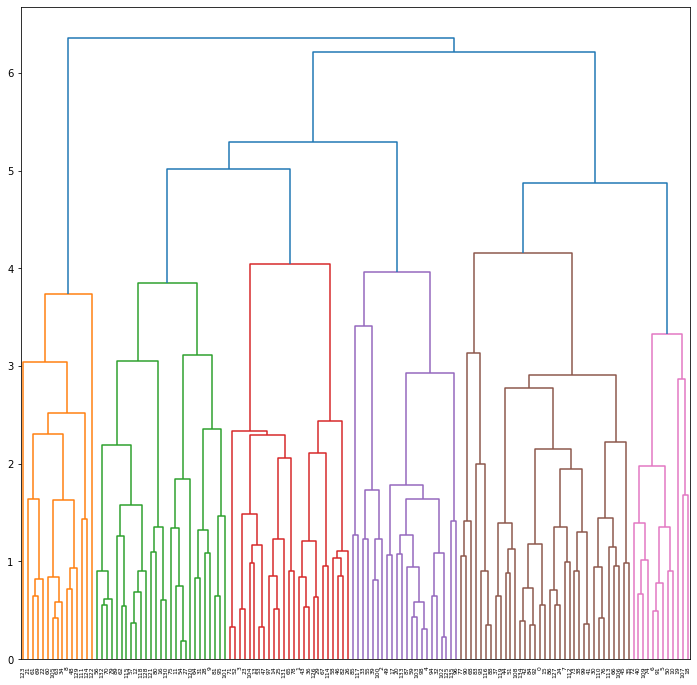

In [104]:
# grouping data based on Complete distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'complete',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot

plt.show()

### Developing a code to analyze the inertia plot.

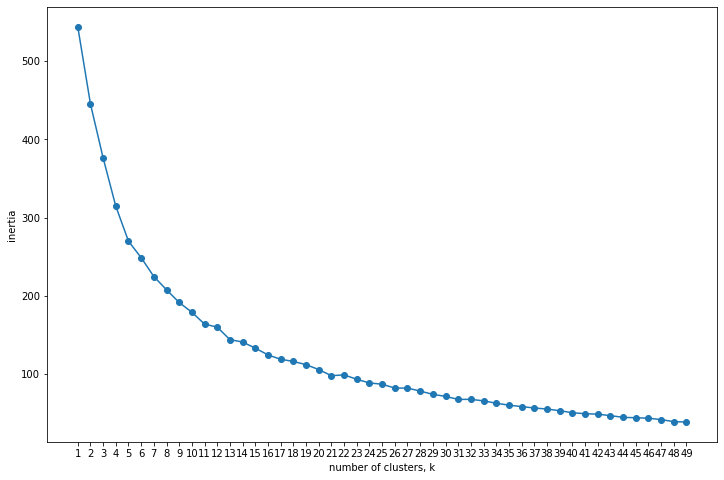

In [105]:
# calling the inertia_plot() function
interia_plot(data=pca_scaled)

Based on the graph, we chose 8 as the best number of clusters.

In [106]:
# INSTANTIATING a k-Means object with clusters
survey_k_pca = KMeans(n_clusters   = 8,
                         random_state = 219)


# fitting the object to the data
survey_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
survey_kmeans_pca = pd.DataFrame({'Cluster': survey_k_pca.labels_})


# checking the results
print(survey_kmeans_pca.iloc[: , 0].value_counts())

3    29
2    23
7    18
5    17
1    16
6    14
0    13
4     6
Name: Cluster, dtype: int64


Here we can see the size of each clusters

In [107]:
# storing cluster centers
centroids_pca = survey_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Mr_Perfect',              
                           'Mr_Party',         
                           'Mr_Chill',
                            'Mr_Busy'] 


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Mr_Perfect,Mr_Party,Mr_Chill,Mr_Busy
0,-1.61,0.52,-0.16,-0.17
1,0.54,1.26,0.30,-0.93
2,1.18,-0.17,-0.74,0.16
3,-0.25,-0.73,-0.11,-0.90
4,-0.31,1.68,0.34,1.45
5,-0.19,-0.98,0.80,1.30
6,0.37,0.14,1.62,-0.17
7,-0.41,0.16,-1.15,0.63


0. extraversion,chill,busy
1. mr party with work 
2. busy with perfect life 
3. not busy 
4. workoholic with social life
5. laid back but not social 
6. easy going
7. busy professional 

In [108]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([survey_kmeans_pca,
                         X_pca_df],
                         axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([survey.loc[ : , ['What laptop do you currently have?', 
                                                 'What laptop would you buy in next assuming if all laptops cost the same?', 
                                                 'What program are you in?', 'What is your age?', 'Gender', 
                                                 'What is your ethnicity?','ict ', 'continents ']],
                                clst_pca_df],
                                axis = 1)


# renaming columns
final_pca_clust_df.columns = ['What laptop do you currently have?', 
                            'What laptop would you buy in next assuming if all laptops cost the same?', 
                            'What program are you in?', 'What is your age?', 'Gender', 
                            'What is your ethnicity?','ict ', 'continents ',
                              'Cluster',
                             'Mr_Perfect',              
                           'Mr_Party',         
                           'Mr_Chill',
                            'Mr_Busy']


# checking the results
#final_pca_clust_df.head(n = 1)

### Analyze with demographics 

#### Laptop Selection

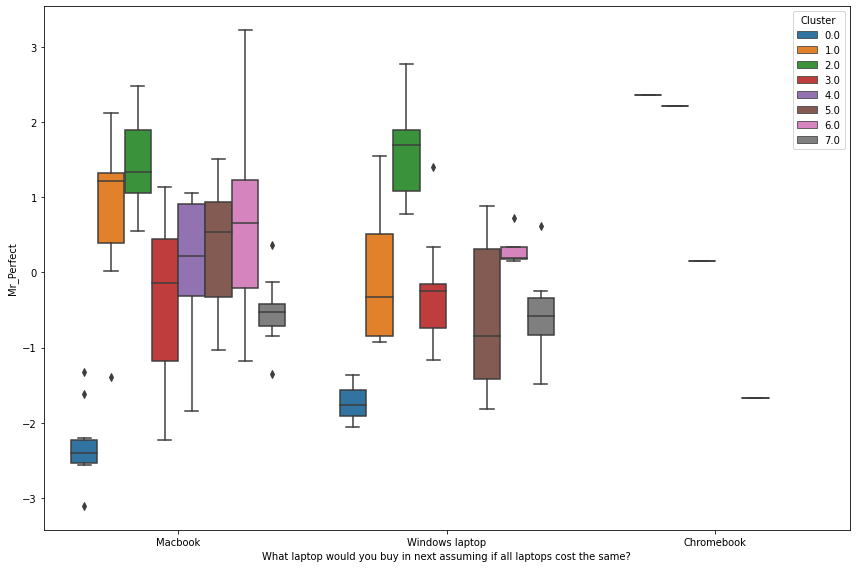

In [109]:
# Laptop Selection - Mr Perfect


fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Mr_Perfect',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

People which are busy with perfect life , Mr party with work are most likely to buy a Mac while people from chill busy lifestyle will not likely buy Windows or Mac

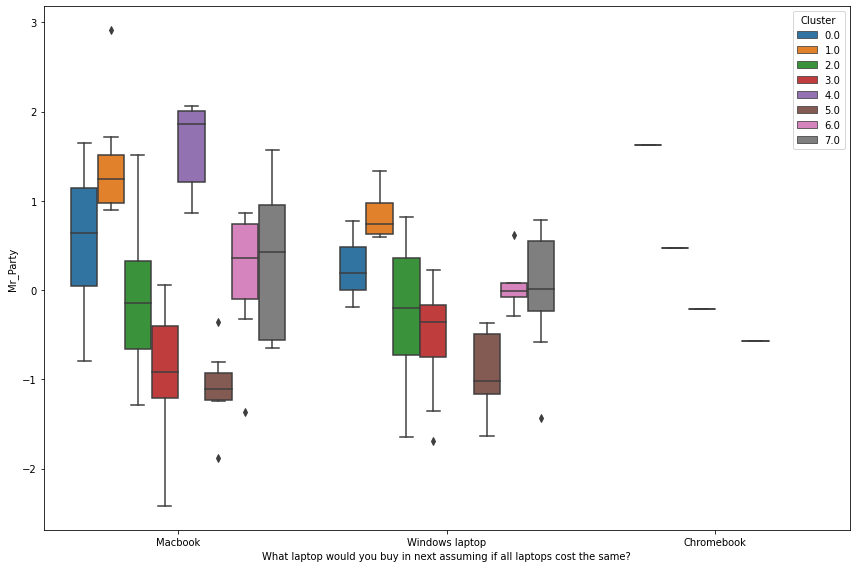

In [110]:
# Laptop Selection - Mr Party

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Mr_Party',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

People that are workoholic with social life ,Mr party with work are more likely to buy an Mac while people that are not busy , laid back people with no social life are less likely to buy either Mac or Windows 

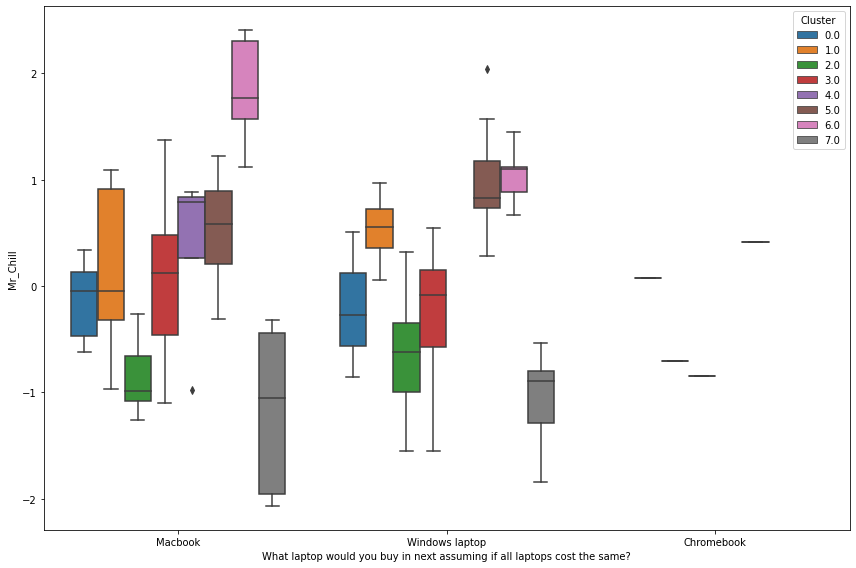

In [111]:
# Laptop Selection - Mr Chill
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Mr_Chill',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

People that are easy going are more likely to buy Mac while people that are busy professional are not going to buy either Mac or. Windows .

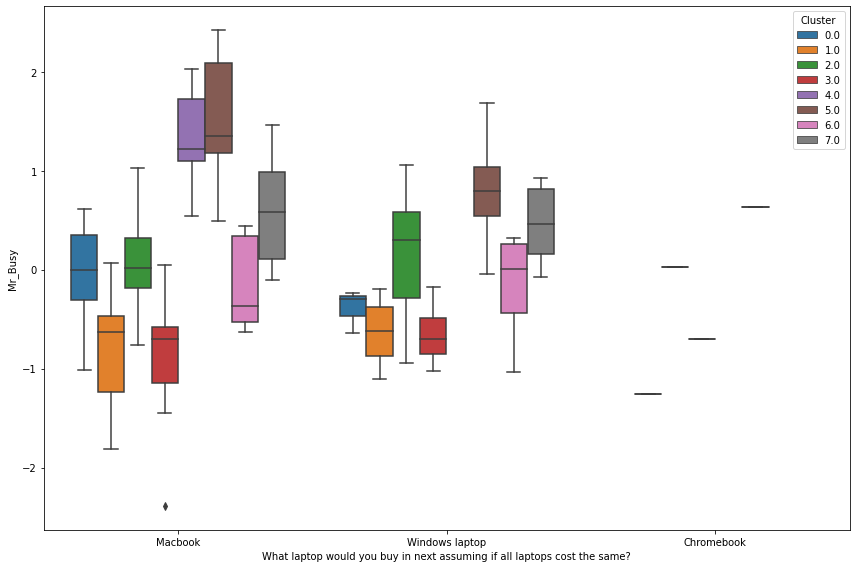

In [112]:
# Laptop Selection - Mr Busy
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Mr_Busy',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

## Agglomerative clustering for Hult DNA

In [113]:
# Dropping original variables: 
survey_df_hult = survey.iloc[: , 93:96]

In [114]:
# Scaling dataset: 

# Dropping demographic information:


# Instantiating:
scaler1 = StandardScaler()

# Fitting:
scaler1.fit(survey_df_hult)

# Transforming:
X_scaled1 = scaler1.transform(survey_df_hult)

# Converting into a DataFrame:
survey_scaled1 = pd.DataFrame(X_scaled1)

# reattaching column names
survey_scaled1.columns = survey_df_hult.columns


# checking pre- and post-scaling variance
print(pd.np.var(survey_df_hult), '\n\n')
print(pd.np.var(survey_scaled1))

thinking          4.943718
communicating     7.272275
team building    19.936365
dtype: float64 


thinking         1.0
communicating    1.0
team building    1.0
dtype: float64


<ipython-input-114-bae6a051c320>:23: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(survey_df_hult), '\n\n')
<ipython-input-114-bae6a051c320>:24: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(survey_scaled1))


### Developing a PCA object with no limit to principal components and analyzing its scree plot.

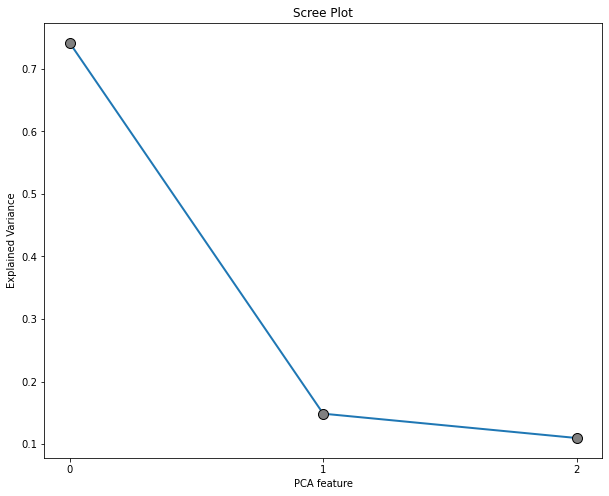

In [115]:
# INSTANTIATING a PCA object with no limit to principal components
pca1 = PCA(n_components=None,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
survey_pca1 = pca1.fit_transform(survey_scaled1)


# calling the scree_plot function
scree_plot(pca_object = pca1)

### Reducing the number of principal components to a reasonable number based on the scree plot above.



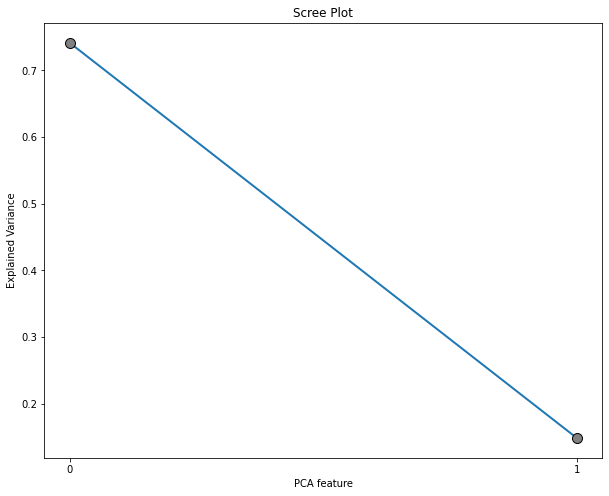

In [116]:
# INSTANTIATING a new model using the first three principal components
pca_2 = PCA(n_components = 2,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
survey_pca_2 = pca_2.fit_transform(survey_scaled1)


# calling the scree_plot function
scree_plot(pca_object = pca_2)

In [117]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings1 = pd.DataFrame(pd.np.transpose(pca1.components_))


# naming rows as original features
factor_loadings1 = factor_loadings1.set_index(survey_scaled1.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_hult = pd.DataFrame(pd.np.transpose(pca1.components_))


# naming rows as original features
factor_loadings_hult = factor_loadings_hult.set_index(survey_scaled1.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings1.round(2)}


5 Components Factor Loadings
------------------------------
{factor_loadings_hult.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                  0     1     2
thinking      -0.56 -0.82  0.11
communicating -0.59  0.31 -0.75
team building -0.58  0.48  0.66


5 Components Factor Loadings
------------------------------
                  0     1     2
thinking      -0.56 -0.82  0.11
communicating -0.59  0.31 -0.75
team building -0.58  0.48  0.66



<ipython-input-117-a2c4494a6c45>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings1 = pd.DataFrame(pd.np.transpose(pca1.components_))
<ipython-input-117-a2c4494a6c45>:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_hult = pd.DataFrame(pd.np.transpose(pca1.components_))


In [118]:
# naming each principal component
factor_loadings_hult.columns = ['Mr_Quiet', 'Mr_Clever', 'Mr_Grumpy'] 


# checking the result
factor_loadings_hult

,Mr_Quiet,Mr_Clever,Mr_Grumpy
thinking,-0.558727,-0.822658,0.105154
communicating,-0.590026,0.305184,-0.747484
team building,-0.582832,0.479683,0.655905


In [119]:
# analyzing factor strengths per customer
X_pca_reduced_hult = pca1.transform(survey_scaled1)


# converting to a DataFrame
X_pca_df_hult = pd.DataFrame(X_pca_reduced_hult)


# renaming columns
X_pca_df_hult.columns = factor_loadings_hult.columns


# checking the results
X_pca_df_hult

,Mr_Quiet,Mr_Clever,Mr_Grumpy
0,-0.040308,-0.034618,0.112525
1,-0.194114,1.044873,-0.813611
2,1.170701,-0.320690,0.032003
3,-0.585713,1.367167,-0.372915
4,2.512244,-0.714192,-0.195418
5,1.389495,-0.433858,0.309186
6,-0.301375,0.180244,0.406322
7,-0.301375,0.180244,0.406322
8,0.681063,0.592197,0.295121
9,-1.711623,-0.590226,-0.283347


In [120]:
# checking variance amongst clusters
np.var(X_pca_df_hult)

Mr_Quiet     2.224690
Mr_Clever    0.446040
Mr_Grumpy    0.329271
dtype: float64

In [121]:
#scaling again due to variance 
# INSTANTIATING a StandardScaler() object
scaler_r = StandardScaler()


# FITTING the scaler with the data
scaler_r.fit(X_pca_df_hult)


# TRANSFORMING our data after fit
X_scaled_pca_r = scaler_r.transform(X_pca_df_hult)


# converting scaled data into a DataFrame
pca_scaled_r = pd.DataFrame(X_scaled_pca_r)


# reattaching column names
pca_scaled_r.columns = ['Mr_Quiet', 'Mr_Clever', 'Mr_Grumpy'] 


# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df_hult), '\n\n')
print(pd.np.var(pca_scaled_r))

Mr_Quiet     2.224690
Mr_Clever    0.446040
Mr_Grumpy    0.329271
dtype: float64 


Mr_Quiet     1.0
Mr_Clever    1.0
Mr_Grumpy    1.0
dtype: float64


<ipython-input-121-1c8d43651261>:23: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(X_pca_df_hult), '\n\n')
<ipython-input-121-1c8d43651261>:24: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(pca_scaled_r))


### Develop a dendrogram to understand how many clusters to build with k-Means

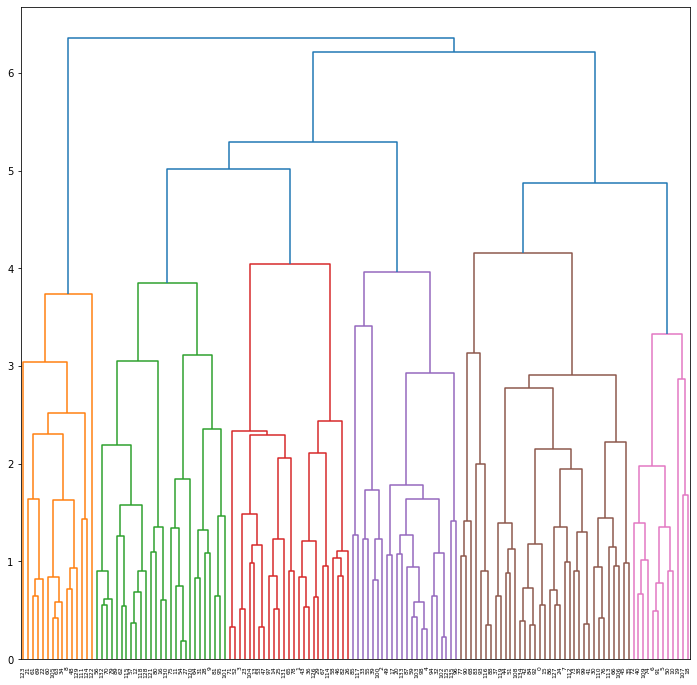

In [122]:
# grouping data based on Ward distance
standard_mergings_comp = linkage(y = pca_scaled_r,
                                 method = 'complete',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot

plt.show()

### Developing a code to analyze the inertia plot.

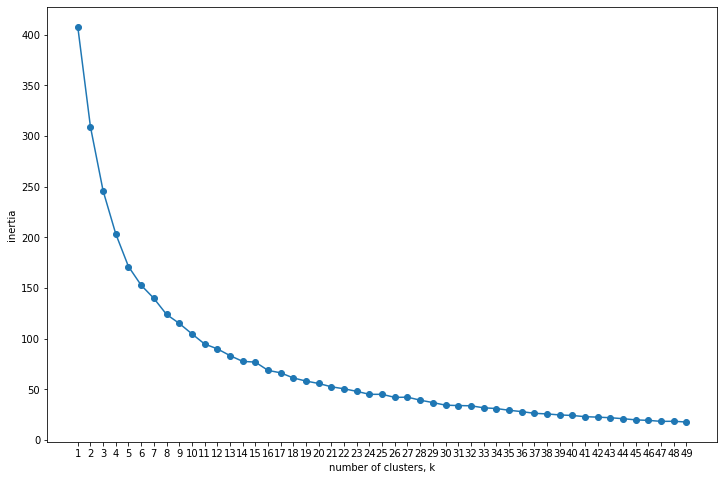

In [123]:
# calling the inertia_plot() function
interia_plot(data=pca_scaled_r)

### Developing a k-Means model with four clusters

In [124]:
# INSTANTIATING a k-Means object with clusters
survey_k_pca_r = KMeans(n_clusters   = 4,
                         random_state = 219)


# fitting the object to the data
survey_k_pca_r.fit(pca_scaled_r)


# converting the clusters to a DataFrame
survey_kmeans_pca_r = pd.DataFrame({'Cluster': survey_k_pca_r.labels_})


# checking the results
print(survey_kmeans_pca_r.iloc[: , 0].value_counts())

1    42
0    40
2    31
3    23
Name: Cluster, dtype: int64


### Displaying the centroids (mean values) for each cluster.

In [125]:
# storing cluster centers
centroids_pca_r = survey_k_pca_r.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df_r = pd.DataFrame(centroids_pca_r)


# renaming principal components
centroids_pca_df_r.columns = ['Mr_Quiet', 'Mr_Clever', 'Mr_Grumpy'] 


# checking results (clusters = rows, pc = columns)
centroids_pca_df_r.round(2)

,Mr_Quiet,Mr_Clever,Mr_Grumpy
0,-0.87,0.37,0.24
1,0.93,0.73,-0.27
2,-0.34,-0.91,-0.91
3,0.27,-0.73,1.30


0. Noisy 
1. Introvert
2. Happy helpful
3. The_Grinch

### Developing a code to concatenate the demographics and PCA components into one DataFrame

In [126]:
# concatenating cluster memberships with principal components
clst_pca_df_r = pd.concat([survey_kmeans_pca_r,
                         X_pca_df_hult],
                         axis = 1)


# checking results
clst_pca_df_r


# concatenating demographic information with pca-clusters
final_pca_clust_df_r = pd.concat([survey.loc[ : , ['What laptop do you currently have?', 
                                                 'What laptop would you buy in next assuming if all laptops cost the same?', 
                                                 'What program are you in?', 'What is your age?', 'Gender', 
                                                 'What is your ethnicity?','ict ', 'continents ']],
                                clst_pca_df_r],
                                axis = 1)


# renaming columns
final_pca_clust_df_r.columns = ['What laptop do you currently have?', 
                            'What laptop would you buy in next assuming if all laptops cost the same?', 
                            'What program are you in?', 'What is your age?', 'Gender', 
                            'What is your ethnicity?','ict ', 'continents ',
                              'Cluster',
                             'Mr_Quiet',
                             'Mr_Clever',
                               'Mr_Grumpy']


# checking the results
final_pca_clust_df_r.head(n = 5)

,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your ethnicity?,ict,continents,Cluster,Mr_Quiet,Mr_Clever,Mr_Grumpy
0,Macbook,Macbook,DD (MIB & Business Analytics),25.0,Female,Hispanic / Latino,no_value,S_American,0.0,-0.040308,-0.034618,0.112525
1,Windows laptop,Windows laptop,One year Business Analytics,27.0,Male,Hispanic / Latino,no_value,S_American,1.0,-0.194114,1.044873,-0.813611
2,Windows laptop,Windows laptop,One year Business Analytics,25.0,Male,West Asian / Indian,2_4,indian,1.0,1.170701,-0.320690,0.032003
3,Windows laptop,Windows laptop,One year Business Analytics,26.0,Female,West Asian / Indian,2_4,indian,1.0,-0.585713,1.367167,-0.372915
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27.0,Male,Far east Asian,4_6,Asian,1.0,2.512244,-0.714192,-0.195418


## Analyze with Demographics

0. Noisy 
1. Introvert
2. Happy helpful
3. The_Grinch

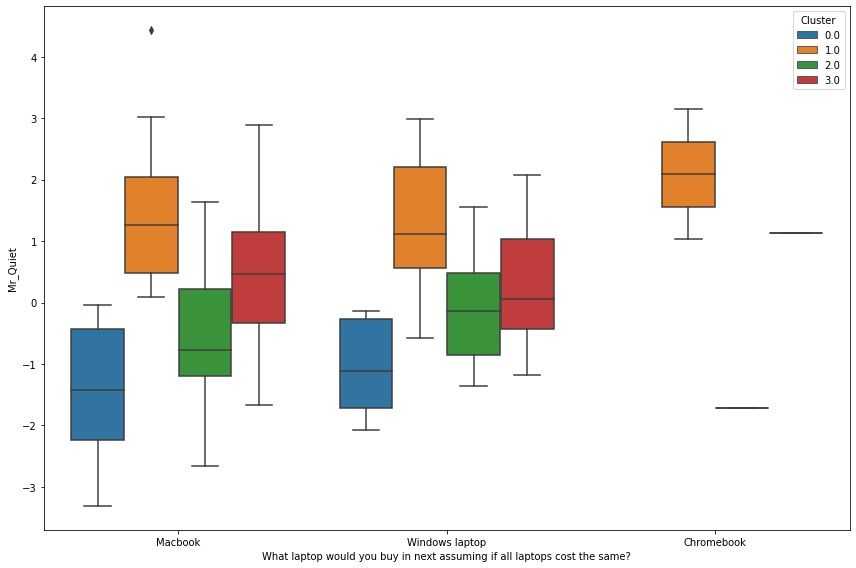

In [127]:
########################
# Channel
########################

# Carnivores
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Mr_Quiet',
            hue = 'Cluster',
            data = final_pca_clust_df_r)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

The noisy people that are also Quiet are less likely to have Macbook compared to windows .

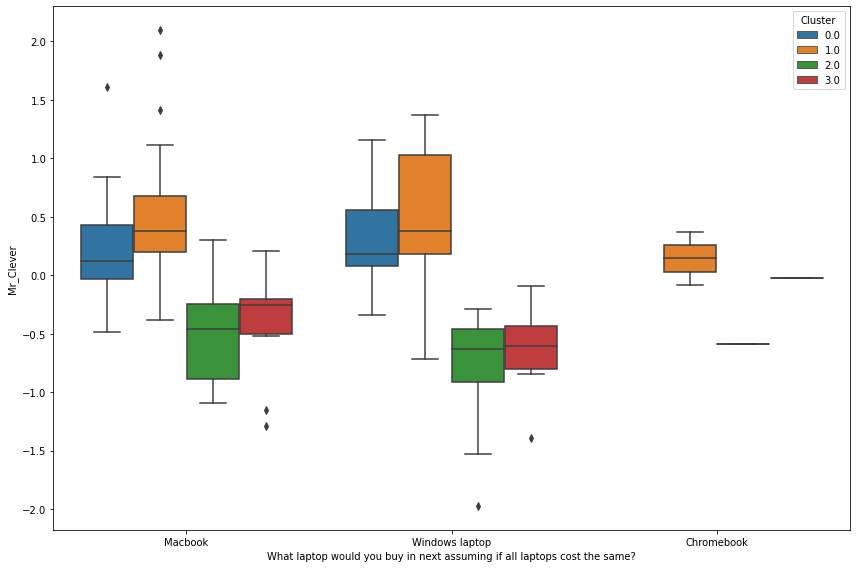

In [128]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Mr_Clever',
            hue = 'Cluster',
            data = final_pca_clust_df_r)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

### Insights

- Based on the above analysis it can be said people are more likely to buy an Mac Laptop over  to Windows but there is also a small population that is likely to buy a Chromebook 

- The people that don't have Hult qualities are more likely going to buy Macbook over Windows .  

- According to the graphs in the big five personality there was not a lot of variance in people planned purchases. The people in the Five personality type are most likely buy the laptops from the same brand that they are currently using .

- People that have great team building skills are less likely to buy  windows .

- People that are open to new experiences are more likely to buy Macbook over Windows .

### Recommendation 

As Apple is the brand that is mostly preferred by the student.They should focus on the people that do not have Macbook  as their current Laptop .The  people that have The Big five personality and have  windows Laptop  are more likely to buy the same Laptop  again .


We recommend to apple to reinforce their brand image based on their core audience.

It seems that people are quite brand loyal and likely to change for the competitor so we suggest to Apple to enter partnerships with higher education institutes.That way student will develop brand loyality while growing up with the apple products.

## Conclusion

As seen in the above analysis Apple is said to have a high brand loyality.They should target the new audience but at the same time maintain the  image that they have portrayed in the past. This data might not be a representative  of the American  market because it was taken from  a group of  International Student coming from everywhere in the world.